# WHAT THIS PROJECT DESCRIBES
1. Importation of required libraries
2. Describes basic information about the data
3. Exploratory Data Analysis.
Location of the neighbourhoods in the map
lowest host based on calculated host listings 
Top 5 neighbourhoods and areas based on calculated host listings
The cheapest neighbourhood
the cheapest area
the most purchased room type
The cheapest room type
average stay per room type
Average neighbourhood price in new york
Data source : kaggle.com/xyz_dataset




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


imported the different functions needed

In [2]:
def my_function(x):
  return list(dict.fromkeys(x))


In [3]:
data = pd.read_csv("AB2_NYC_2019.CSV")

imported data set into jupyter notebook

In [4]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Checked the different data types in the data set

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

checked the overall information on the data set including the number of non blank enteries

In [6]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Checked the number of blank enteries in the data set

In [7]:
data.fillna({'reviews_per_month':0}, inplace=True)

Replaced the blank enteries with 0

In [8]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

checked again to verify changes have been made

In [9]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


Viewed the first 5 enteries on the data set

In [10]:
data.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,0.0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,0.0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,0.0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,0.0,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,0.0,1,23


Viewed the last 5 enteries on the data set

In [11]:
data.describe(include = ["O"])

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47896,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,6/23/2019
freq,18,417,21661,3920,25409,1413


checked the different unique enteries,the numbers of enteries for each colunm, the top entery,the frequency of the enteries

In [12]:
data1 = data.drop(columns = ["id","host_id","name", "last_review","host_name"])

Removed unnecessary columns

In [13]:
data1.corr()


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.018758,0.019517,-0.010983
longitude,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.138516,-0.114713,0.082731
price,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829
minimum_nights,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,-0.018758,0.138516,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701
availability_365,-0.010983,0.082731,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000


correlated the dtta set to find out the relationship between the different enteries

Text(0.5, 1, 'Heat Map Correlation Of New York BNB Data')

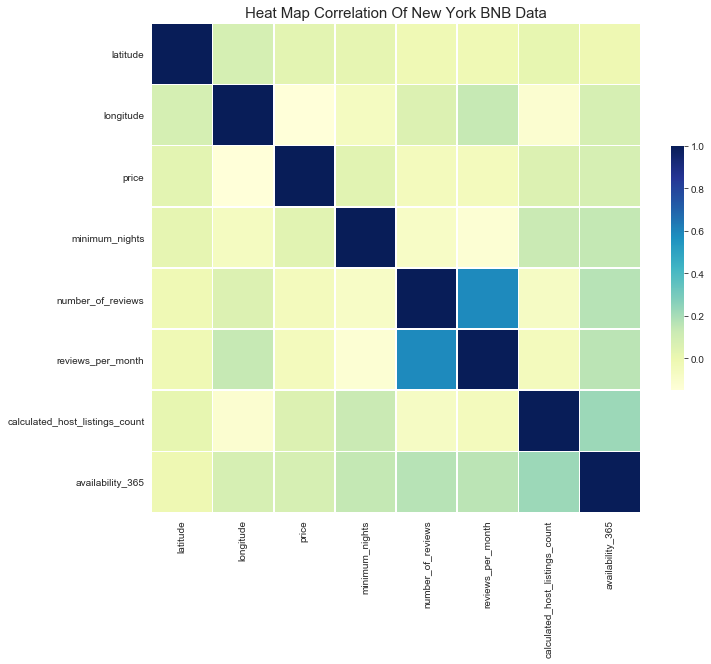

In [14]:
# Compute correlations
corr = data1.corr()

# Set background color / chart style
sns.set_style(style = 'dark')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw correlation plot
sns.heatmap(corr, cmap="YlGnBu", 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

# Set Title of Heat Map
ax.set_title("Heat Map Correlation Of New York BNB Data", fontsize = 15)

## Observation : 
From the plotted heat map, i observed that reviews per month and number of reviews have the most relationship with each other, cause they are both connected to the reviews on the platform.  

Plotted the enteries in a pair plot according to the different nieghbourhood groups  

Plotted the enteries in a pair plot according to the different room types  

In [17]:
# Grouped the data set using neighbourhood group  
grouped_neighbourhood_group = data.groupby("neighbourhood_group")
# Calculated the mean of the calculated host listings and put them in a list
mean_calculated_host_listings_count = list(grouped_neighbourhood_group.mean()["calculated_host_listings_count"])
# Rounded up the values in the list to 1 decimal place
mean_calculated_host_listings_count = [round(i,1) for i in mean_calculated_host_listings_count ]
# Set nieghbourhood group as neighbourhood_Group
neighbourhood_Group = data.neighbourhood_group
# Then put it in a list
neighbourhood_Group = list(neighbourhood_Group)
# Delete Reoccuring values 
neighbourhood_Group = my_function(neighbourhood_Group)

neighbourhood_Group,mean_calculated_host_listings_count 

(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
 [2.2, 2.3, 12.8, 4.1, 2.3])

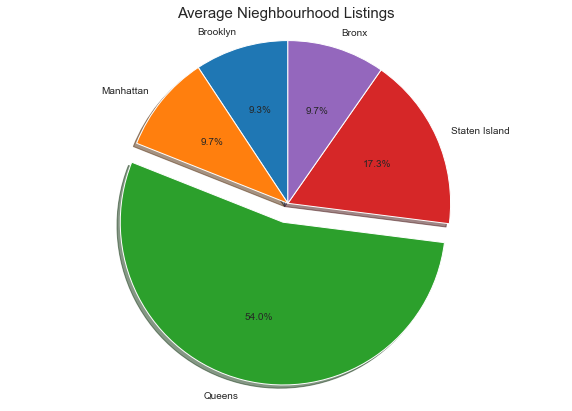

In [18]:
# Set variable mean of calculated host listings 
calculated_host_listings_count = mean_calculated_host_listings_count
# Bring out the #rd slice queens
explode = (0, 0, 0.12, 0, 0)
# Set up  matplotlib figure
fig1, ax = plt.subplots(figsize=(10,7))
# Draw Pie chart
ax.pie(calculated_host_listings_count ,labels=neighbourhood_Group, autopct='%1.1f%%',
        shadow=True, startangle=90,explode = explode)
# Set Title of Pie chart
ax.set_title('Average Nieghbourhood Listings', fontsize = 15)
# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')
# Show pie chart
plt.show()

## Observation : 
From the pie chart, I observed that Queens has the highest average host listings in New york, meaning that it has the highest amount of buildings being used as an Air BNB in New York, this could be due to an Queens having most active hosts on the platform.

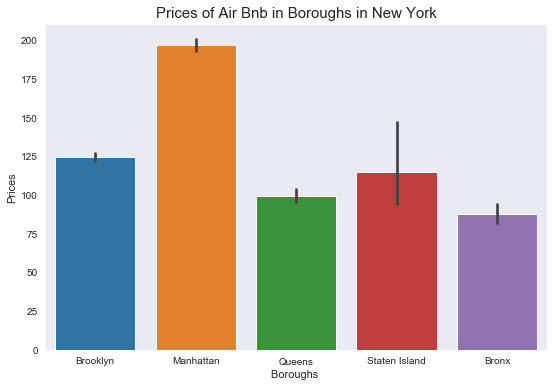

<Figure size 648x432 with 0 Axes>

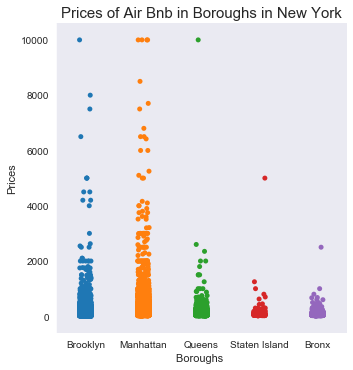

In [35]:
# Set size of Bar chart
plt.figure(figsize=(9,6))
# Draw Bar chart
sns.barplot(x="neighbourhood_group", y="price", data= data1)
plt.xlabel(" Boroughs  ",fontsize = 11 )
plt.ylabel("Prices",fontsize = 11)
plt.title("Prices of Air Bnb in Boroughs in New York",fontsize = 15)
# Show Bar chart
plt.show()

# Set size of Bar chart
plt.figure(figsize=(9,6))
# Draw Bar chart
sns.catplot(x="neighbourhood_group", y="price", data=data1)
plt.xlabel(" Boroughs  ",fontsize = 11 )
plt.ylabel("Prices",fontsize = 11)
plt.title("Prices of Air Bnb in Boroughs in New York",fontsize = 15)
# Show Bar chart
plt.show()

## Observation : 
From the bar chart, I notieced that Manhattan has the highest price of all the neighbourhoods, this could be due to the fact that it is the most densely populated neighbourhood in New York. The more the population the more people are going to need to stay in an AirBnb, thats what makes the price go up.The bar plot shows an aggregation of some values. The black lines on each of the  bars shows how spread out the original non-aggregated data was .The second Graph shows where the deviation occours in the first graph. 

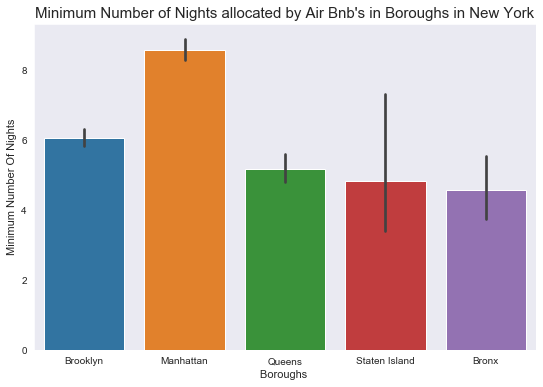

In [20]:
# Set size of Bar chart
plt.figure(figsize=(9,6))
# Draw Bar chart
sns.barplot(x="neighbourhood_group", y="minimum_nights", data= data1)
plt.xlabel(" Boroughs  ",fontsize = 11 )
plt.ylabel("Minimum Number Of Nights",fontsize = 11)
plt.title("Minimum Number of Nights allocated by Air Bnb's in Boroughs in New York",fontsize = 15)
# Show Bar chart
plt.show()

## Observation
The bar chart shows Manhattan has the highest minimum number of nights an individual is allowed to rent an AirBnb in New York, it could be becuase this neighbourhood is more safer and accomodating to outsiders. The bronx has the lowest number of minimum nights an individual is allowed to stay though it is not much lower than the other AirBnb.

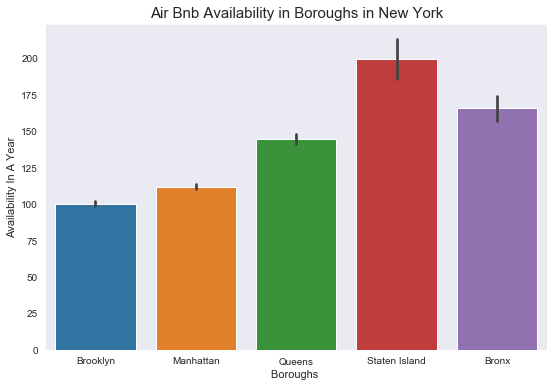

In [21]:
plt.figure(figsize=(9,6))
sns.barplot(x="neighbourhood_group", y="availability_365", data=data1)
plt.xlabel(" Boroughs  ",fontsize = 11 )
plt.ylabel("Availability In A Year",fontsize = 11)
plt.title("Air Bnb Availability in Boroughs in New York",fontsize = 15)
plt.show()

## Observation: 
The bar chart shows that Staten Islands AirBnb are available through out the year more than the other neighbourhoods. Bronx is also open but not as much as Staten Island. this could be due to the fact that individual giong to Staten Island maybe looking to stay longer than people in the other neighbourhoods and brooklyn has the lowest availability, this could be due to security reasons. 

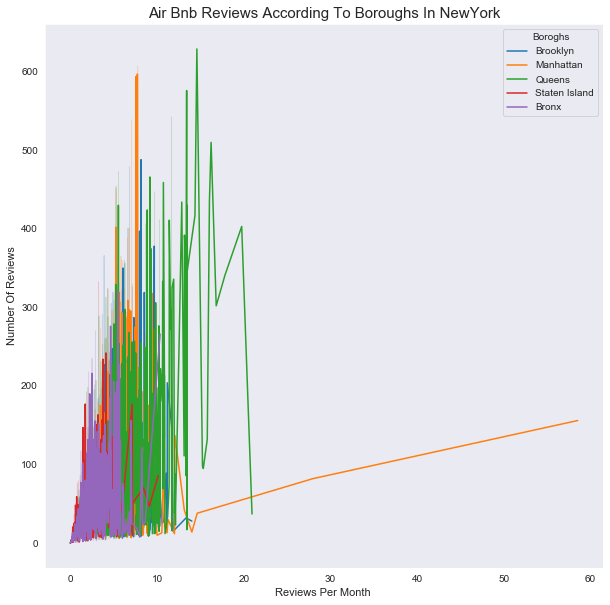

In [49]:
plt.figure(figsize=(10,10))
sns.lineplot(x='reviews_per_month',y='number_of_reviews',hue = "neighbourhood_group",data=data1,legend =False)
plt.xlabel(" Reviews Per Month  ",fontsize = 11 )
plt.ylabel("Number Of Reviews",fontsize = 11)
plt.title("Air Bnb Reviews According To Boroughs In NewYork",fontsize = 15)
plt.legend(title='Boroghs', loc='upper right', labels=['Brooklyn', 'Manhattan','Queens','Staten Island','Bronx'])
plt.show()

## Observation:
The line Graph above shows Manhattan has the highest number of reviews per month and also has a high number of reviews on the platform, this is due to the fact that AirBnb's in Manhattan make sure thier customers leave reviews on the AirBnb in Manhattan.Queens also has the highest number of reviews but not the highest number of reviews per month, this could be due to the fact that Queens has the hihghest number of listings on the platform, although reviews are left it is not as consistent as Manhattan. 

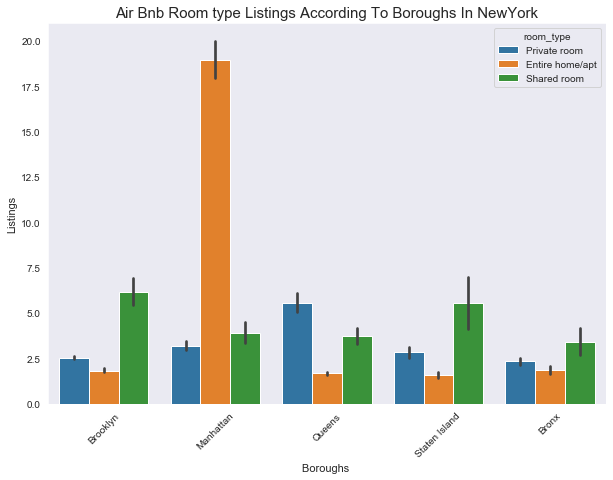

In [65]:
plt.figure(figsize=(10,7))
sns.barplot(x = "neighbourhood_group", y = "calculated_host_listings_count", hue = "room_type", data = data1)
plt.xlabel(" Boroughs  ",fontsize = 11 )
plt.ylabel("Listings",fontsize = 11)
plt.title("Air Bnb Room type Listings According To Boroughs In NewYork",fontsize = 15)
plt.xticks(rotation=45)
plt.show()

## Observation:
The above chart shows Manhattan has the highest number of listings for entire home/atp among all five boroughs even though it is the most expensive room type, this is because a high number of residents in manhattan are renting out their homs as AirBnb's when they travel. Shared rooms are listed higher than any other group because it is the list sort out room type in the boroughs except from Brooklyn.
source:https://www.wired.com/story/airbnb-new-york-city-reach-truce-on-home-sharing-data/

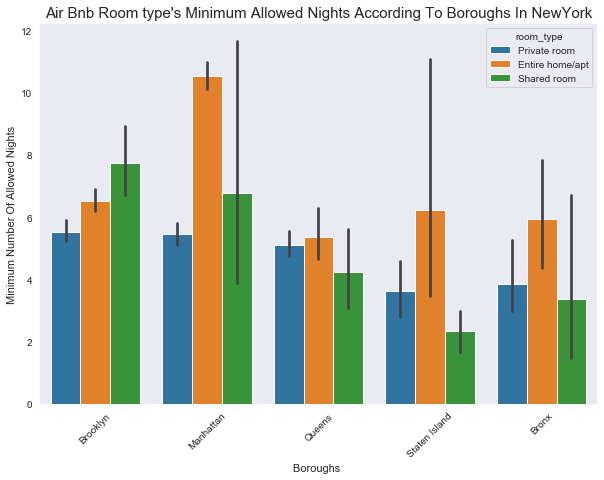

In [66]:
plt.figure(figsize=(10,7))
sns.barplot(x = "neighbourhood_group", y = "minimum_nights", hue = "room_type", data = data1)
plt.xlabel(" Boroughs  ",fontsize = 11 )
plt.ylabel("Minimum Number Of Allowed Nights",fontsize = 11)
plt.title("Air Bnb Room type's Minimum Allowed Nights According To Boroughs In NewYork",fontsize = 15)
plt.xticks(rotation=45)
plt.show()

## Observation:
The above chart shows Entire home/apt has the highest number of allowed minimum night among all the different Boroughs, except from Brooklyn which has shared room as its top according to amount of minimum nights aloowed. Entire Home/apt has the highest due to the fact that a lot of people renting an entire home would love to stay for more than one or two days

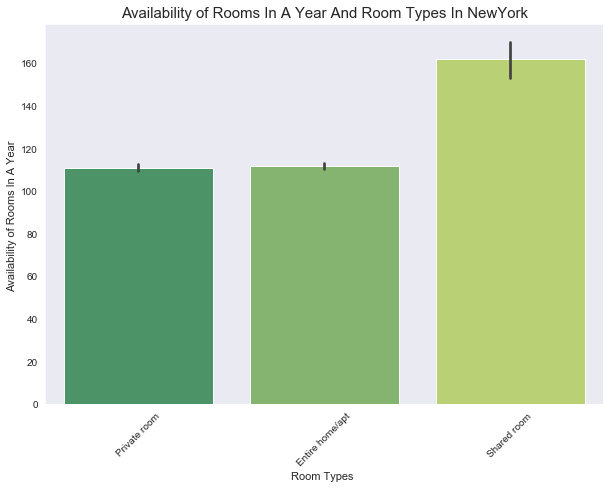

In [68]:
plt.figure(figsize=(10,7))
color = sns.color_palette("summer",n_colors=3)
sns.barplot(x = "room_type", y = "availability_365", palette = color, data = data1)
plt.xlabel(" Room Types  ",fontsize = 11 )
plt.ylabel("Availability of Rooms In A Year ",fontsize = 11)
plt.title("Availability of Rooms In A Year And Room Types In NewYork",fontsize = 15)
plt.xticks(rotation=45)
plt.show()

## Observation:


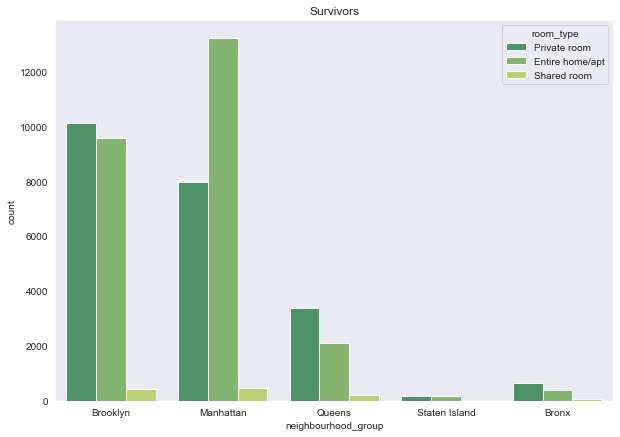

In [69]:
plt.figure(figsize=(10,7))
sns.countplot(x = "neighbourhood_group", hue = "room_type", data = data1, palette = 'summer')
plt.title('Survivors')
plt.show()

<Figure size 720x504 with 0 Axes>

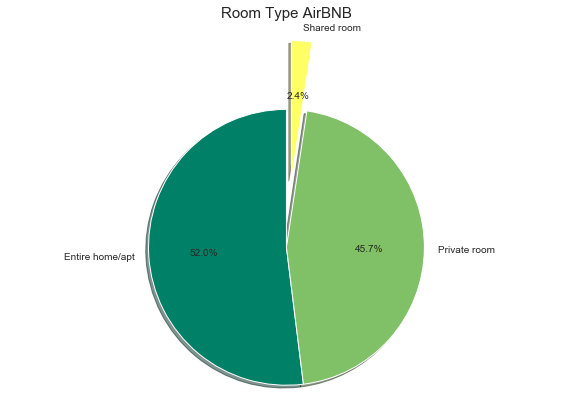

In [29]:
result = data1.groupby(["room_type"], as_index ="True").count().sort_values(by= "calculated_host_listings_count",ascending = False)
plt.figure(figsize=(10,7))
label = result.index
count = result.calculated_host_listings_count
cmap = plt.cm.summer
color = cmap(np.linspace(0., 1., len(label)))
explode = (0, 0, 0.5)
fig1, ax = plt.subplots(figsize=(10,7))
ax.pie(count ,labels=label, autopct='%1.1f%%',
        shadow=True,colors = color, startangle=90,explode = explode)
ax.set_title('Room Type AirBNB', fontsize = 15)

ax.axis('equal')

plt.show()

In [31]:
data1.tail()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.0,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.0,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.0,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.0,6,2
48894,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,0.0,1,23


In [32]:
neighbourhood_area= data[['neighbourhood','calculated_host_listings_count']].groupby(['neighbourhood'], as_index =False).count().sort_values(by= "calculated_host_listings_count",ascending = False)
neighbourhood_area_index = neighbourhood_area.head(20).set_index('neighbourhood')
neighbourhood_area_index

,calculated_host_listings_count
neighbourhood,
Williamsburg,3920
Bedford-Stuyvesant,3714
Harlem,2658
Bushwick,2465
Upper West Side,1971
Hell's Kitchen,1958
East Village,1853
Upper East Side,1798
Crown Heights,1564
